# 1. Import Libraries

In [ ]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.express as px

# To scale variables
from sklearn.preprocessing import StandardScaler

# To identify pricipal components
from sklearn.decomposition import PCA 

# To perform K-Means Clustering
from sklearn import cluster
from sklearn.cluster import KMeans

# To scale independent numerical variables
from sklearn.preprocessing import QuantileTransformer

# To perform Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# To perform DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE

# To choose the best combination for DBScan
from itertools import product
from sklearn.metrics import silhouette_score

# To produce dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Import data

In [ ]:
# importing the dataset
data = pd.read_csv('Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# checking if there is any NULL data

data.isnull().any().any()

False

In [ ]:
features = list(data.columns)
print(features)

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


# 3. Exploratory data analysis & Data Visualization

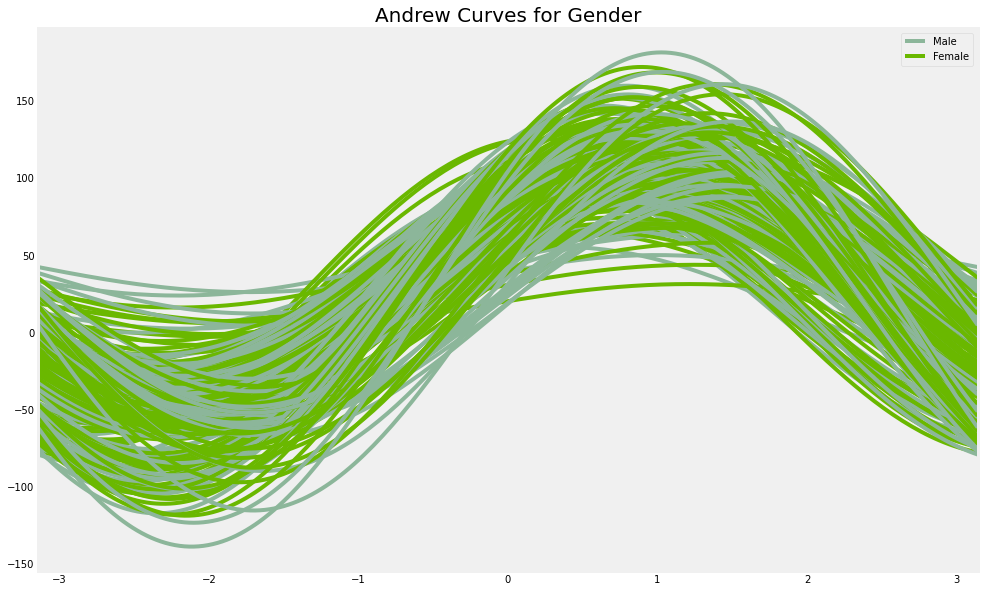

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)


plotting.andrews_curves(data.drop("CustomerID", axis=1), "Gender")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

- It has been shown the Andrews curves are able to preserve means, distance (up to a constant) and variances. Which means that Andrews curves that are represented by functions close together suggest that the corresponding data points will also be close together

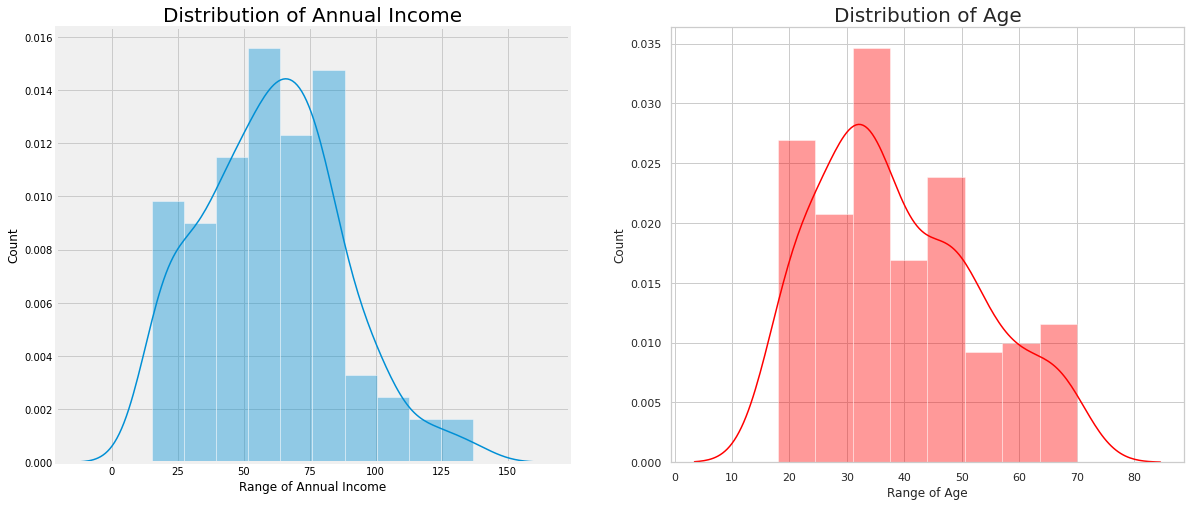

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

Here, In the above Plots we can see the Distribution pattern of Annual Income and Age, By looking at the plots,

- we can infer one thing that There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. Also, we can say that the least Income is around 20 US Dollars.

Taking inferences about the Customers.

- The most regular customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Youngsters are lesser in umber as compared to the Middle aged people.

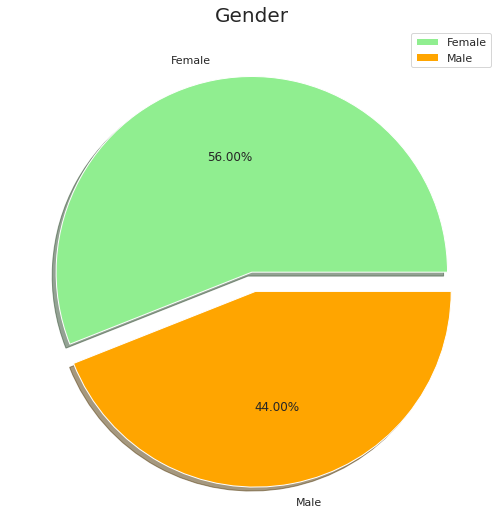

In [ ]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

By looking at the above pie chart which explains about the distribution of Gender in the Mall

- Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.

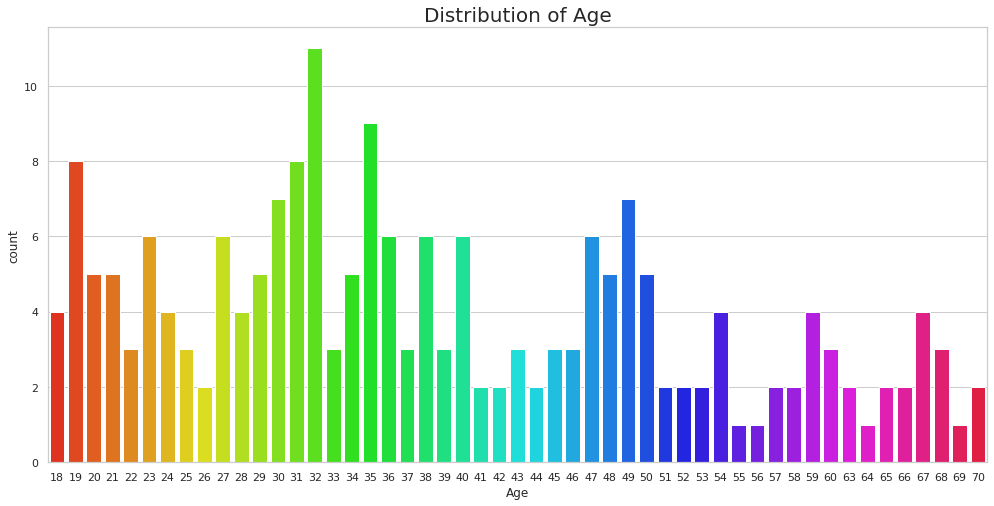

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

This Graph shows a more Interactive Chart about the distribution of each Age Group in the Mall for more clariy about the Visitor's Age Group in the Mall.

- By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

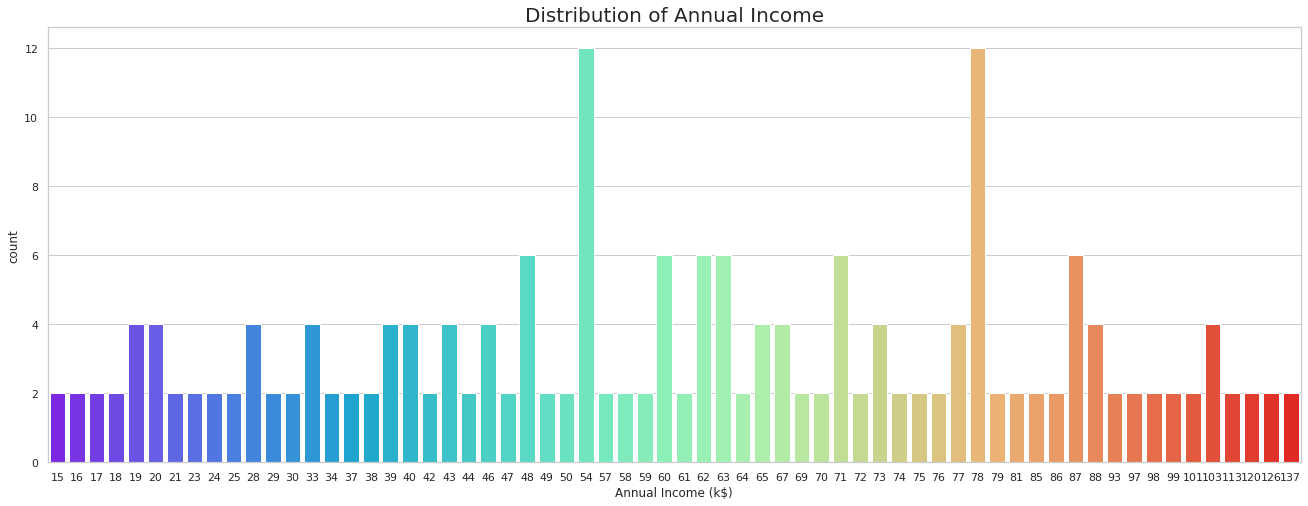

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

- Again, This is also a chart to better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable freqyuency with their Annual Income ranging from 15 US Dollars to 137K US Dollars. There are more Customers in the Mall whoc have their Annual Income as 54k US Dollars or 78 US Dollars.

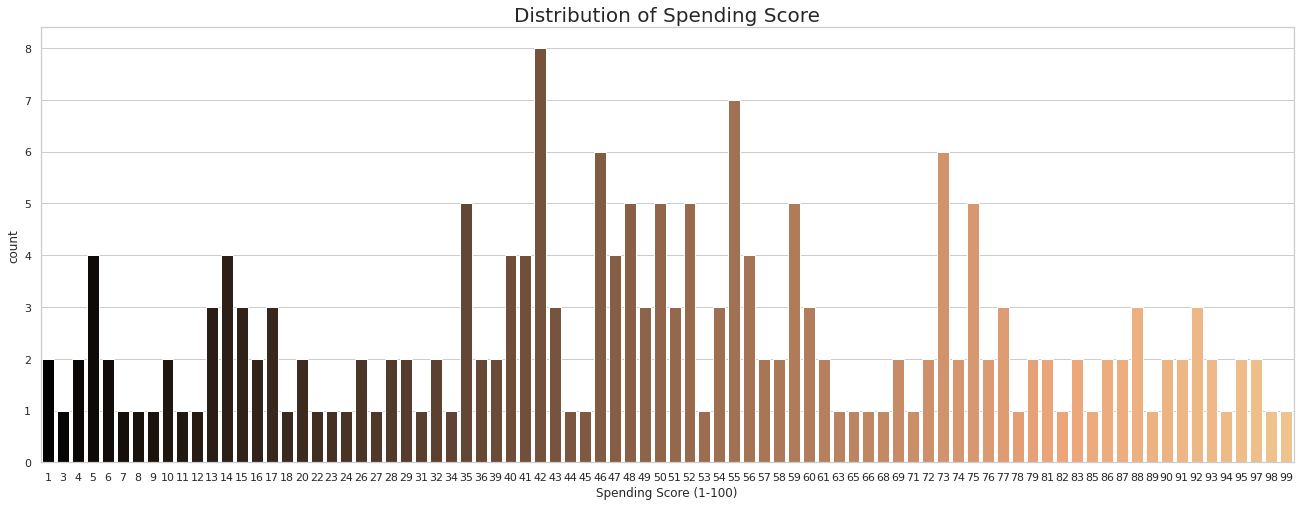

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

This is the Most Important Chart in the perspective of Mall, as It is very Important to have some intuition and idea about the Spending Score of the Customers Visiting the Mall.

- On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60. Interesting there are customers having I spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.

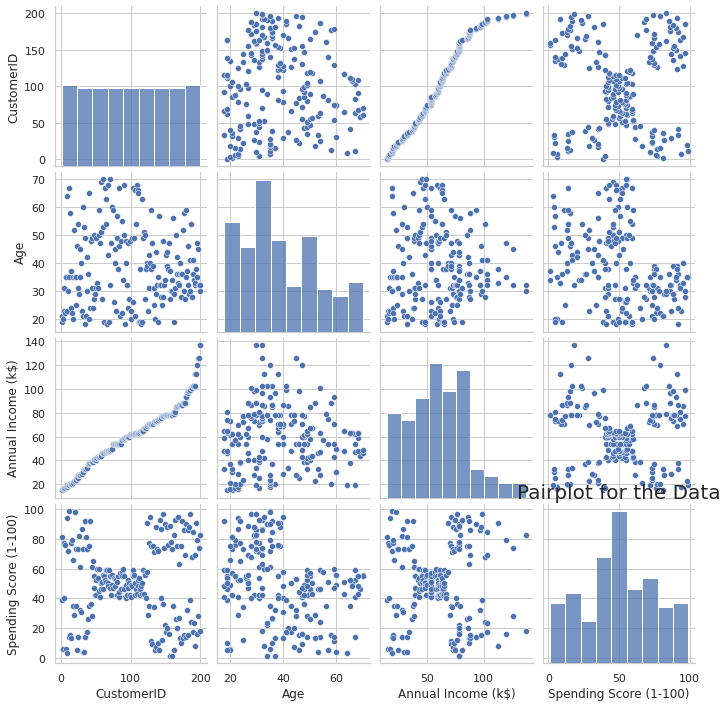

In [ ]:
sns.pairplot(data)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

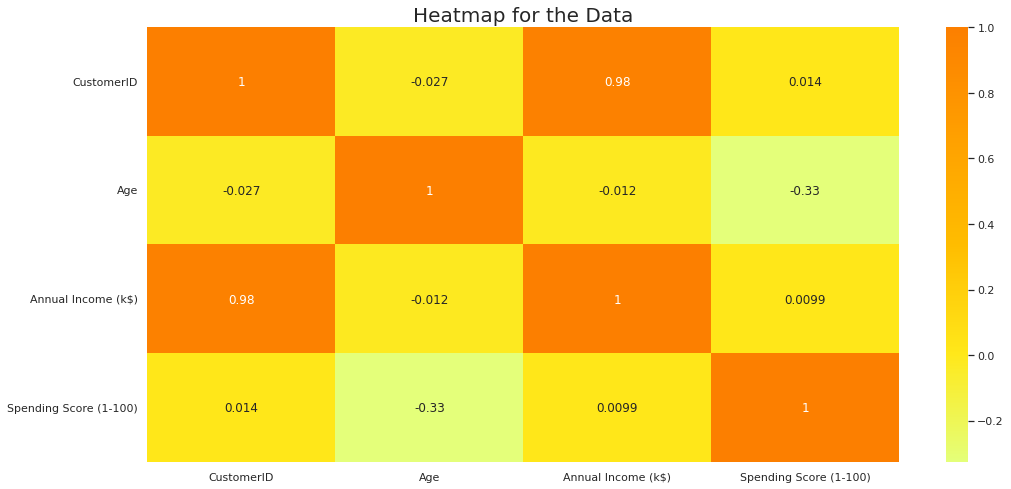

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.

- We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

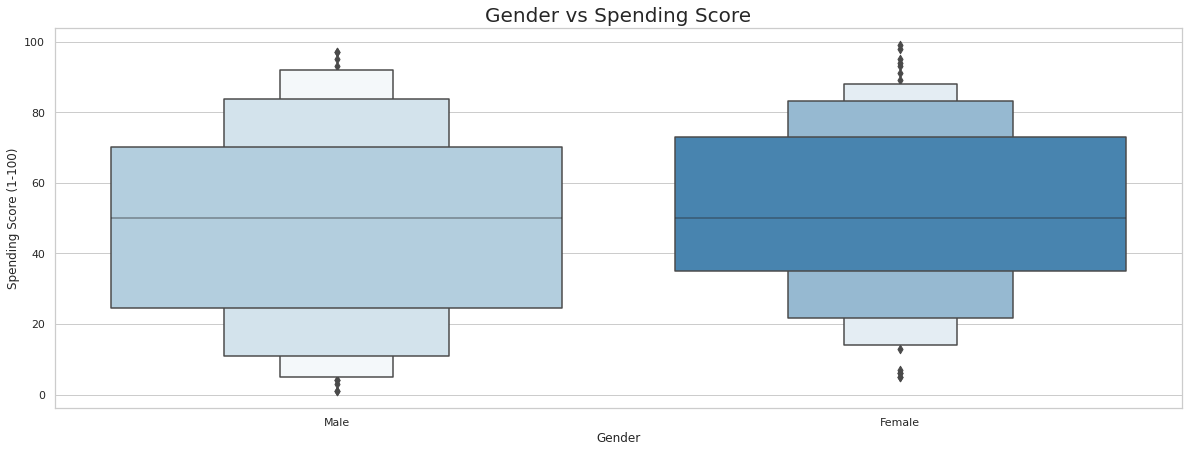

In [ ]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

Bi-variate Analysis between Gender and Spending Score,

- It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. which again points to the fact that women are Shopping Leaders.

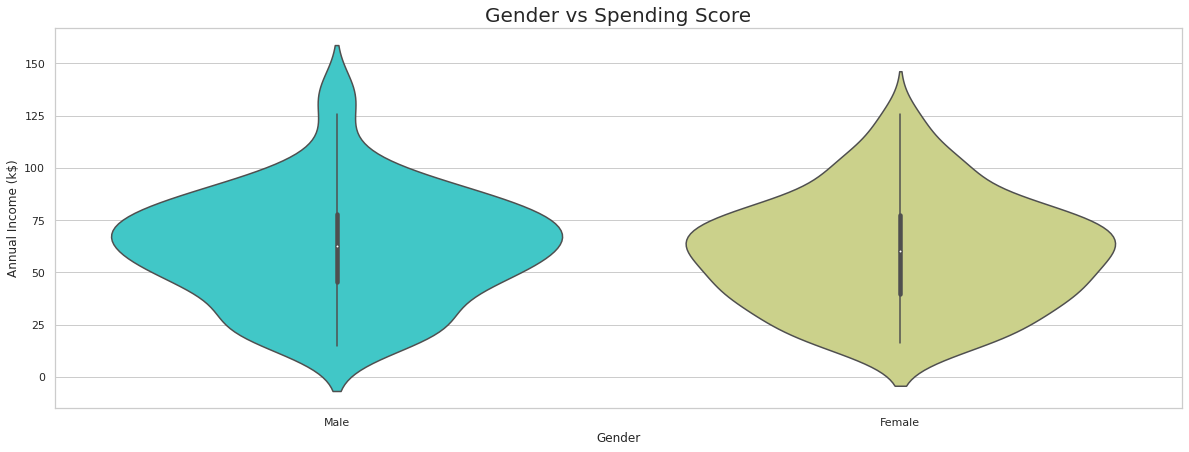

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['Gender'], data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

Again a Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders.

- There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income.

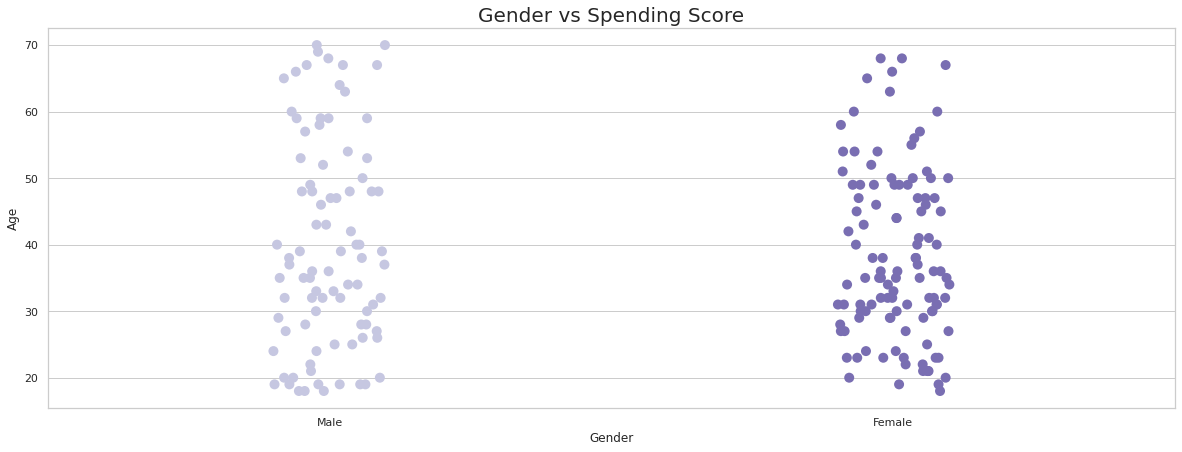

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(data['Gender'], data['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

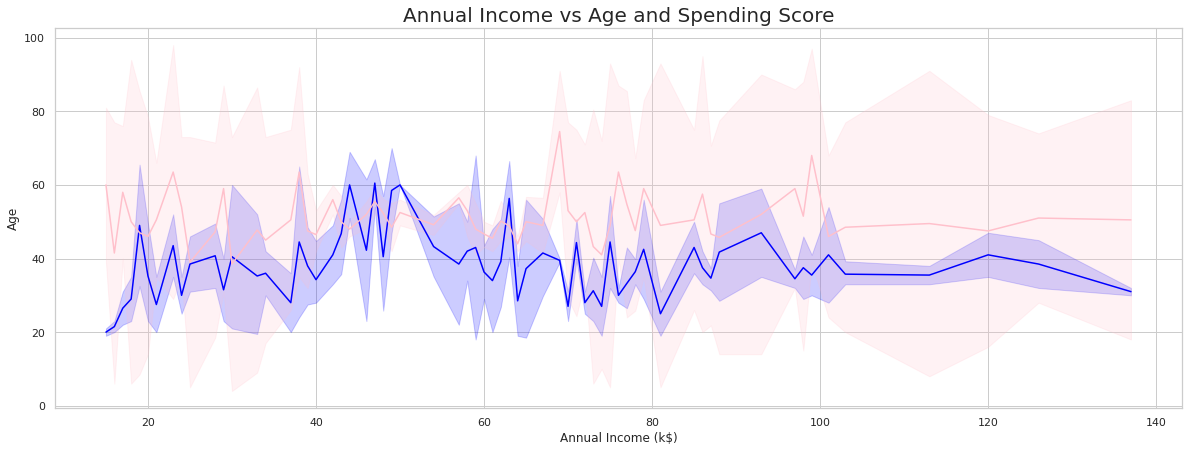

In [ ]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

The above Plot Between Annual Income and Age represented by a blue color line, and a plot between Annual Income and the Spending Score represented by a pink color. shows how Age and Spending Varies with Annual Income.


# 4. Functions for clustering

In [ ]:
# Function to find optimim K Value
def findk(df):
    distortions = []  

    for i in range(1, 11):
        km = cluster.KMeans(n_clusters=i,
                init='k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 0)
        km.fit(df.values)
        distortions.append(km.inertia_)

    #Plotting the K-means Elbow plot
    plt.figure(figsize = (7,7)) 
    plt.plot(range(1,11), distortions, marker='o')
    plt.title('ELBOW PLOT')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

In [ ]:
# Function to Scale variables
def scale_function(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.values)
    return scaled_data

In [ ]:
# Function to perform K-Means Clustering
def kmeans_function(data,k):
    km = cluster.KMeans(n_clusters=k,
                init='k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 0)
    km.fit(data.values)
    label = km.labels_
    return label,data

In [ ]:
# Function Performs Hierarchical Clustering
def hierarchical_function(data,k):
    h_cluster = AgglomerativeClustering(n_clusters=k, 
                                    affinity='euclidean',
                                    linkage='ward').fit(data)

    labels = h_cluster.labels_
    return labels,data

In [ ]:
# Function Performs DBScan Clustering
def dbscan_function(data,eps,minPts):
    cluster = DBSCAN(eps=eps, min_samples=minPts).fit(data)
    labels = cluster.labels_
    
    #identifying the points which makes up our core points
    sample_cores=np.zeros_like(labels,dtype=bool)

    sample_cores[cluster.core_sample_indices_]=True

    #Calculating the number of clusters

    n_clusters=len(set(labels))- (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("No. of clusters: ",n_clusters)

    print("Score: ",metrics.silhouette_score(data,labels))
    # y_pred = cluster.fit_predict(data)
    # plt.scatter(data[:,0], data[:,1],c=y_pred, cmap='Paired')
    # plt.title("DBSCAN")

    return labels,data,sample_cores

# 5. KMeans Clustering

In [ ]:
model1 = data.copy()

In [ ]:
model1.drop(['CustomerID', "Gender"], axis = 1, inplace=True)

In [ ]:
features = list(model1.columns)
print(features)

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [ ]:
scaled_data = scale_function(model1)
kmeans_data = pd.DataFrame(scaled_data,columns = features)

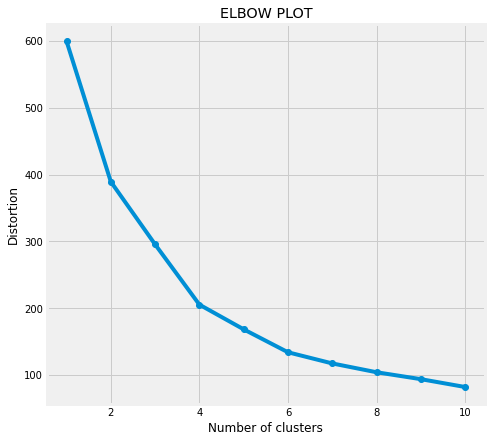

In [ ]:
findk(kmeans_data)

In [ ]:
labels, km_data = kmeans_function(kmeans_data,6)

In [ ]:
km_data['labels'] = labels

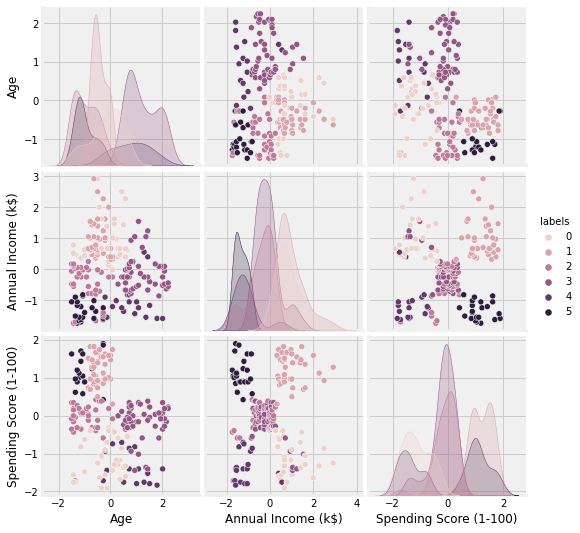

In [ ]:
sns.pairplot(km_data, x_vars = features, y_vars = features, hue='labels', diag_kind='kde')
plt.show()

In [ ]:
cluster_df = pd.concat([model1[km_data['labels']==0].mean(), 
                        model1[km_data['labels']==1].mean(), 
                        model1[km_data['labels']==2].mean(),
                        model1[km_data['labels']==3].mean(),
                        model1[km_data['labels']==4].mean()],
                  axis=1)
cluster_df.columns = ['cluster1','cluster2','cluster3','cluster4','cluster5']

In [ ]:
# Setting options for legible output display

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
cluster_df

,cluster1,cluster2,cluster3,cluster4,cluster5
Age,46.831,32.875,25.220,25.000,65.263
Annual Income (k$),63.065,86.100,54.195,25.261,53.105
Spending Score (1-100),29.364,81.525,43.585,77.609,49.789


#6. Hierarchical Clustering

In [ ]:
model2 = data.copy()

In [ ]:
model2.drop(['CustomerID', "Gender"], axis = 1, inplace=True)

In [ ]:
features = list(model2.columns)
print(features)

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [ ]:
scaled_data = scale_function(model2)
hcluster_data1 = pd.DataFrame(scaled_data,columns = features)

In [ ]:
labels_hclstr,hcluster_data = hierarchical_function(hcluster_data1,5)

In [ ]:
hcluster_data['labels'] = labels_hclstr

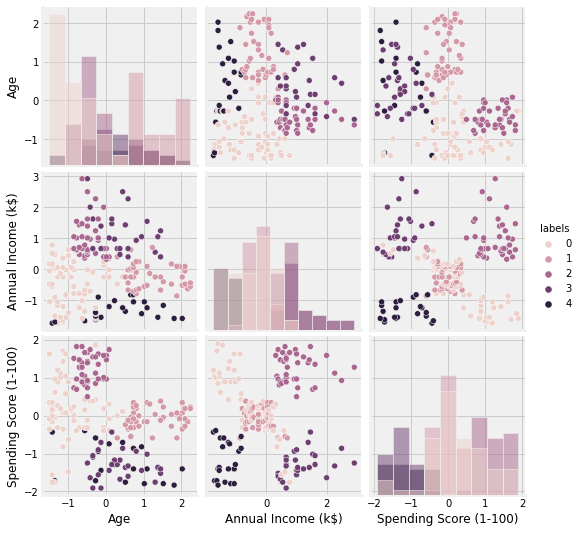

In [ ]:
sns.pairplot(hcluster_data,x_vars = features,y_vars = features,
             hue='labels',diag_kind='hist')
plt.show()

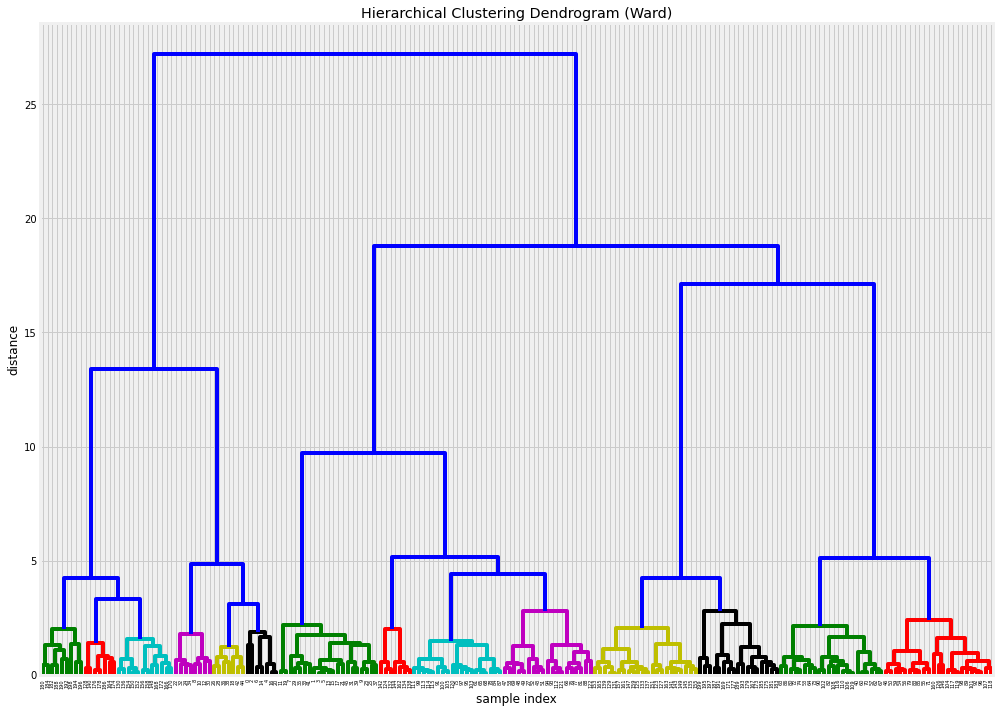

In [ ]:
linkage_matrix = linkage(hcluster_data, 'ward')
figure = plt.figure(figsize=(14, 10))
dendrogram(linkage_matrix,color_threshold=3)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

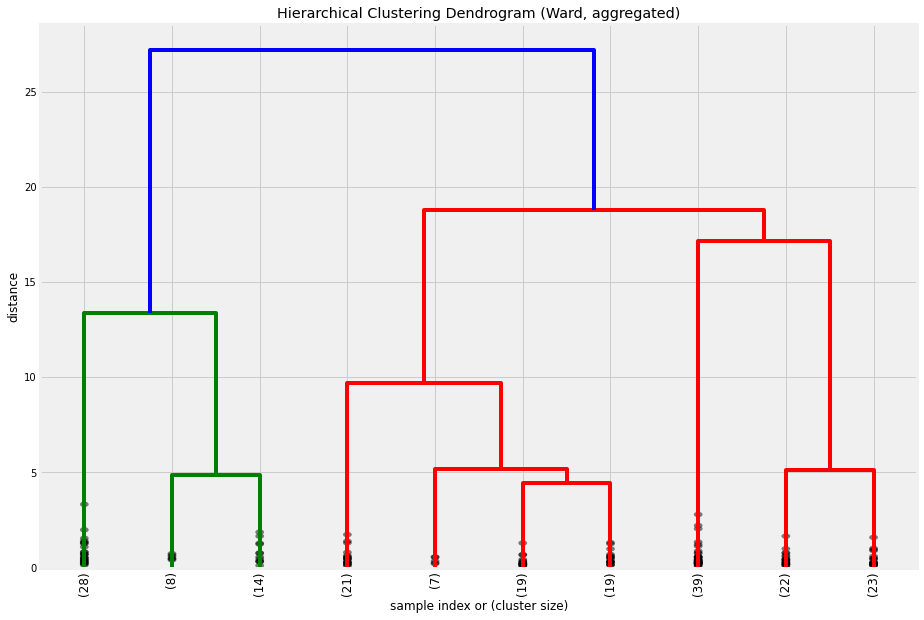

In [ ]:
figure = plt.figure(figsize=(14,10))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,                   # fixing 'p'
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True),  # to get a distribution impression in truncated branches
        
plt.title('Hierarchical Clustering Dendrogram (Ward, aggregated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [ ]:
hcluster_df = pd.concat([model2[hcluster_data['labels']==0].mean(), 
                        model2[hcluster_data['labels']==1].mean(), 
                        model2[hcluster_data['labels']==2].mean(),
                        model2[hcluster_data['labels']==3].mean(),
                        model2[hcluster_data['labels']==4].mean()],
                  axis=1)
hcluster_df.columns = ['cluster1','cluster2','cluster3','cluster4','cluster5']

In [ ]:
# Setting options for legible output display

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
hcluster_df

,cluster1,cluster2,cluster3,cluster4,cluster5
Age,26.561,56.400,32.692,43.893,44.318
Annual Income (k$),47.364,55.289,86.538,91.286,25.773
Spending Score (1-100),56.788,48.356,82.128,16.679,20.273


#7. DBScan

In [ ]:
cluster_data2 = data.copy()

In [ ]:
cluster_data2.drop(['CustomerID', 'Gender'], axis = 1, inplace=True)

In [ ]:
features = list(cluster_data2.columns)
print(features)

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [ ]:
scaled_data = scale_function(cluster_data2)
dbscan_data = pd.DataFrame(scaled_data,columns = features)

In [ ]:
from itertools import product

eps_values = np.linspace(0.7, 0.8,num =11) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(dbscan_data)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(dbscan_data, DBS_clustering.labels_))

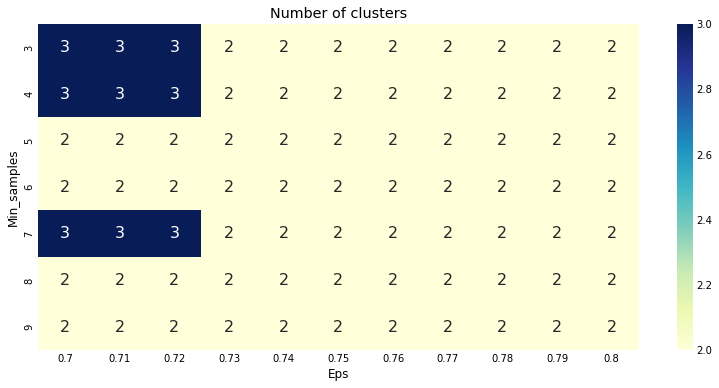

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

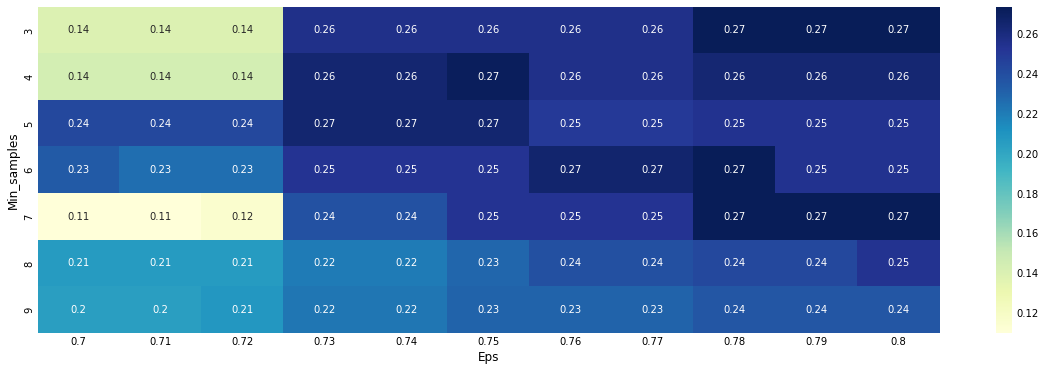

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [ ]:
labels_dbscan,data_dbscan, core_samples_mask = dbscan_function(dbscan_data,0.6,3)

No. of clusters:  3
Score:  0.1779359406589818


In [ ]:
data_dbscan['labels'] = labels_dbscan

In [ ]:
n_clusters=len(set(labels_dbscan))- (1 if -1 in labels_dbscan else 0)
n_noise_ = list(labels_dbscan).count(-1)
print("Noise points: ", n_noise_,"out of", len(list(labels_dbscan)))

Noise points:  14 out of 200


In [ ]:
df = data_dbscan.copy()

In [ ]:
X_embedded = TSNE(n_components=2).fit_transform(df)

In [ ]:
df["x_component"]=X_embedded[:,0]
df["y_component"]=X_embedded[:,1]

In [ ]:
import plotly.express as px
fig = px.scatter(df, x="x_component", y="y_component", color = "labels", size_max=60)
fig.update_layout(height=800)
fig.show()

In [ ]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(dbscan_data)
distances, indices = neighbors_fit.kneighbors(dbscan_data)

Text(0, 0.5, 'Epsilon')

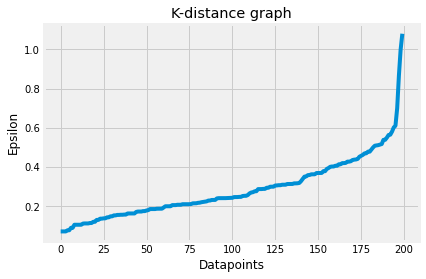

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance graph')
plt.xlabel('Datapoints')
plt.ylabel('Epsilon')
